In [1]:
!pip install --q datasets soundfile speechbrain
!pip install --q sentencepiece
!pip install --q datasets
!pip install --upgrade accelerate --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.6/630.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 7.4 MB/s eta 0:00:00


# Hugginface Login

In [3]:
from huggingface_hub import notebook_login

notebook_login()

# Load the model

In [2]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

# Load Dataset


In [7]:
from datasets import load_dataset, DatasetDict, Audio

common_voice = DatasetDict()

common_voice["train"] = load_dataset("mozilla-foundation/common_voice_13_0", "fa", split="train", use_auth_token=True)
common_voice["test"] = load_dataset("mozilla-foundation/common_voice_13_0", "fa", split="test", use_auth_token=True)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:2483: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10218it [00:00, 102170.11it/s]
Reading metadata...: 28024it [00:00, 122189.64it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 10440it [00:00, 120670.46it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 10440it [00:00, 122486.44it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 20673it [00:00, 126944.37it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 14071it [00:00, 114807.49it/s]
/usr/local/lib/python3.10/dist-packages/datasets/load.py:2483: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [8]:
common_voice["train"]

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
    num_rows: 28024
})

In [9]:
# Remove unnecessary columns
common_voice = common_voice.remove_columns(['path', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'])
common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))

In [10]:
common_voice

DatasetDict({
    train: Dataset({
        features: ['client_id', 'audio', 'sentence'],
        num_rows: 28024
    })
    test: Dataset({
        features: ['client_id', 'audio', 'sentence'],
        num_rows: 10440
    })
})

In [11]:
dataset = common_voice["train"].cast_column("audio", Audio(sampling_rate=16000))

# Modifying Tokenizer

In [12]:
# tokenizer = processor.tokenizer

In [13]:
# # Concatenate all sentences in the training dataset
# all_text = " ".join(common_voice["train"]["sentence"])

# # Extract unique characters to create vocabulary
# vocab = list(set(all_text))

# # Create a dataset containing the vocabulary and all concatenated text
# vocabs = common_voice["train"].map(
#     lambda batch: {"vocab": [vocab], "all_text": [all_text]},
#     batched=True,
#     batch_size=-1,
#     keep_in_memory=True,
#     remove_columns=dataset.column_names,
# )

# # Extract the vocabulary from the created dataset
# dataset_vocab = set(vocabs["vocab"][0])

# # Extract the vocabulary from the tokenizer
# tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}


In [14]:
# new_char = dataset_vocab - tokenizer_vocab
# new_tokens = processor.tokenizer.add_tokens(list(new_char))
# updated_vocab = processor.tokenizer.get_vocab()

In [15]:
def update_tokenizer_with_dataset_vocab(processor, common_voice):
    tokenizer = processor.tokenizer

    # Concatenate all sentences in the training dataset
    all_text = " ".join(common_voice["train"]["sentence"])

    # Extract unique characters to create vocabulary
    vocab = list(set(all_text))

    # Create a dataset containing the vocabulary and all concatenated text
    vocabs = common_voice["train"].map(
        lambda batch: {"vocab": [vocab], "all_text": [all_text]},
        batched=True,
        batch_size=-1,
        keep_in_memory=True,
        remove_columns=dataset.column_names,
    )

    # Extract the vocabulary from the created dataset
    dataset_vocab = set(vocabs["vocab"][0])

    # Extract the vocabulary from the tokenizer
    tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}

    # Find new characters in the dataset vocab that are not in the tokenizer vocab
    new_chars = dataset_vocab - tokenizer_vocab

    # Add new tokens to the tokenizer
    new_tokens = processor.tokenizer.add_tokens(list(new_chars))

    # Get the updated vocabulary
    updated_vocab = processor.tokenizer.get_vocab()

    return updated_vocab

# Assuming 'processor' and 'common_voice' are already defined
updated_vocab = update_tokenizer_with_dataset_vocab(processor, common_voice)


Map:   0%|          | 0/28024 [00:00<?, ? examples/s]

In [16]:
# tokenizer_vocab = {k for k, _ in tokenizer.get_vocab().items()}
# dataset_vocab - tokenizer_vocab

# Speakers

In [18]:
from collections import defaultdict
speaker_counts = defaultdict(int)

for client_id in dataset["client_id"]:
    speaker_counts[client_id] += 1

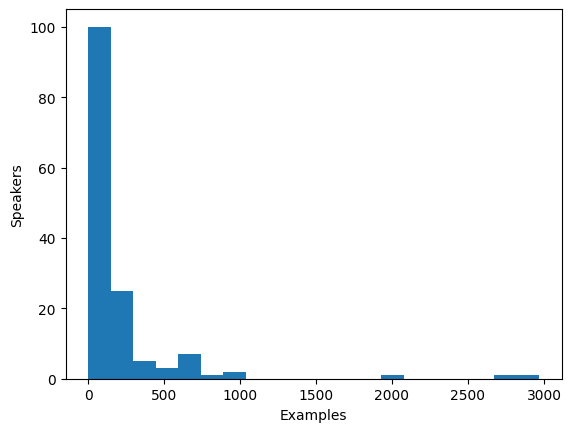

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

In [20]:
def select_speaker(speaker_id):
    return 0 <= speaker_counts[speaker_id] <= 1000

dataset = dataset.filter(select_speaker, input_columns=["client_id"])

Filter:   0%|          | 0/28024 [00:00<?, ? examples/s]

In [21]:
len(set(dataset["client_id"]))

142

# Speaker embeddings

In [22]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

# Define the pretrained speaker recognition model
custom_spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

# Choose the device (cuda if available, otherwise cpu)
custom_device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pretrained speaker recognition model
custom_speaker_model = EncoderClassifier.from_hparams(
    source=custom_spk_model_name,
    run_opts={"device": custom_device},
    savedir=os.path.join("/tmp", custom_spk_model_name)
)

def generate_custom_speaker_embedding(input_waveform):
    # Ensure no gradients are calculated during inference
    with torch.no_grad():
        # Encode the input waveform using the pretrained model
        custom_speaker_embeddings = custom_speaker_model.encode_batch(torch.tensor(input_waveform))

        # Normalize the embeddings along the last dimension
        custom_speaker_embeddings = torch.nn.functional.normalize(custom_speaker_embeddings, dim=2)

        # Squeeze the tensor to remove singleton dimensions and convert to numpy array
        custom_speaker_embeddings = custom_speaker_embeddings.squeeze().cpu().numpy()

    return custom_speaker_embeddings

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [23]:
def prepare_dataset(example):
    # Load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # Feature extraction and tokenization using the processor
    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # Strip off the batch dimension from the labels
    example["labels"] = example["labels"][0]

    # Use SpeechBrain to obtain x-vector speaker embeddings
    example["speaker_embeddings"] = generate_custom_speaker_embedding(audio["array"])

    return example

In [24]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/19402 [00:00<?, ? examples/s]

# Training

In [25]:
common_voice

DatasetDict({
    train: Dataset({
        features: ['client_id', 'audio', 'sentence'],
        num_rows: 28024
    })
    test: Dataset({
        features: ['client_id', 'audio', 'sentence'],
        num_rows: 10440
    })
})

In [26]:
dataset

Dataset({
    features: ['input_ids', 'labels', 'speaker_embeddings'],
    num_rows: 19402
})

In [27]:
dataset = dataset.train_test_split(test_size=0.1)

In [28]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 17461
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 1941
    })
})

In [29]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 500

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/17461 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1941 [00:00<?, ? examples/s]

In [30]:
# dataset = dataset.train_test_split(test_size=0.1)

In [31]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # Extract input_ids, label_features, and speaker_features from the provided features
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # Collate the inputs and targets into a batch using the processor's pad method
        batch = self.processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # Replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # Not used during fine-tuning, so it's removed from the batch
        del batch["decoder_attention_mask"]

        # Round down target lengths to a multiple of the reduction factor if applicable
        if self.model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % self.model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # Add speaker embeddings to the batch
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch


In [32]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [33]:
model.config.use_cache = False

In [34]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_fa_kh",
    per_device_train_batch_size=16,
    gradient_accumulation_steps=2,
    learning_rate=1e-4,
    warmup_steps=500,
    max_steps=6000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=500,
    logging_steps=25,
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=False,
)

In [35]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss
500,0.635500,0.600808
1000,0.580200,0.570030
1500,0.570300,0.532141
2000,0.553400,0.531975
2500,0.544100,0.519837
3000,0.538000,0.502330
3500,0.514000,0.491730
4000,0.519100,0.489570
4500,0.500200,0.481429
5000,0.489400,0.474633


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=7000, training_loss=0.5411437758037022, metrics={'train_runtime': 7485.9182, 'train_samples_per_second': 29.923, 'train_steps_per_second': 0.935, 'total_flos': 1.1456415696643632e+16, 'train_loss': 0.5411437758037022, 'epoch': 8.54})

In [ ]:
kwargs = {
    "dataset_tags": "facebook/voxpopuli",
    "dataset": "VoxPopuli",
    "dataset_args": "config: nl, split: train",
    "language": "nl",
    "model_name": "SpeechT5 TTS Farsi",
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    "tags": "",
}

# Evaluate

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
trainer.push_to_hub('KHooshanfar/SpeechT5_TTS_fa')

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/KHooshanfar/speecht5_tts_fa_arh/commit/3681e6ce51cd3b99b72d0740840e04fd68334b82', commit_message='KHooshanfar/SpeechT5_TTS_fa', commit_description='', oid='3681e6ce51cd3b99b72d0740840e04fd68334b82', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained("KHooshanfar/speecht5_tts_fa_kh")

In [ ]:
example = common_voice["test"][300]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [55]:
text = " خروجی است"

In [ ]:
tokenizer = processor.tokenizer

In [ ]:
tokenizer.decode(tokenizer(text)["input_ids"])

'  خ ر و ج ی   ا س ت </s>'

In [ ]:
inputs = processor(text=text, return_tensors="pt")

In [ ]:
model.to("cpu")

SpeechT5ForTextToSpeech(
  (speecht5): SpeechT5Model(
    (encoder): SpeechT5EncoderWithTextPrenet(
      (prenet): SpeechT5TextEncoderPrenet(
        (embed_tokens): Embedding(165, 768, padding_idx=1)
        (encode_positions): SpeechT5ScaledPositionalEncoding(
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (wrapped_encoder): SpeechT5Encoder(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (layers): ModuleList(
          (0-11): 12 x SpeechT5EncoderLayer(
            (attention): SpeechT5Attention(
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (dropout): Dropout(p=0.1, inplace=False)
    

In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

with torch.no_grad():
    speech = vocoder(spectrogram)

In [54]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)